In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("../Data/Model_Data_Rev1.xlsx")
df.dropna(inplace=True, how='any')
df.head()

,Date,Active_Rig_Count,Offshore_Rig_Supply,Offshore_Rig_Active,Offshore_Utilization_Rate,Land_Rig_Active_Count,Crude_Price_2010_USD,Adjusted_Nat_Gas_Price_2010,World_Oil_Cunsump,World_Oil_Production
130,1985-11-01,3550,656.13,560.67,85.45,2989.33,61.65,4.721732,4992.770925,4929.677119
131,1985-12-01,3618,655.52,557.97,85.12,3060.03,54.23,4.540844,5149.646289,4929.677119
132,1986-01-01,3495,658.23,541.16,82.22,2953.84,45.53,4.524317,5149.646289,5127.913140
133,1986-02-01,3123,656.32,512.18,78.04,2610.82,30.70,4.492806,5149.646289,5127.913140
134,1986-03-01,2681,655.81,467.77,71.33,2213.23,25.22,4.317624,5149.646289,5127.913140


In [3]:
act_rig_count_train = df["Active_Rig_Count"]

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

look_back = 300 # look back 40 data points (months) to make prediction


Using TensorFlow backend.


In [5]:
def create_dataset(data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [6]:
data = np.reshape(act_rig_count_train.values, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
X, y = create_dataset(data, look_back)
# reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

In [7]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.fit(X, y, epochs=350, batch_size=1, verbose=2)

# make prediction
val = data[-look_back:] # last batch in the training data
predictions = []

# forecast the next 200 data points
for _ in range(24):
    pred = model.predict(val.reshape(1,1,look_back))
    predictions = np.append(predictions,pred)
    val = np.append(np.delete(val, 0), pred) # update the data batch to be fed in the next iteration
predictions = predictions.reshape(predictions.shape[0],1)

# reverse forecasted results to its original scale
predictions = scaler.inverse_transform(predictions)

Epoch 1/350
 - 1s - loss: 0.0711 - mean_squared_error: 0.0711
Epoch 2/350
 - 0s - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 3/350
 - 0s - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 4/350
 - 0s - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 5/350
 - 0s - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 6/350
 - 0s - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 7/350
 - 0s - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 8/350
 - 0s - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 9/350
 - 0s - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 10/350
 - 0s - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 11/350
 - 0s - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 12/350
 - 0s - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 13/350
 - 0s - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 14/350
 - 0s - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 15/350
 - 0s - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 16/350
 - 0s - loss: 0.0012 - mean_squared_error: 0.0012
E

 - 0s - loss: 2.5339e-04 - mean_squared_error: 2.5339e-04
Epoch 122/350
 - 0s - loss: 2.9590e-04 - mean_squared_error: 2.9590e-04
Epoch 123/350
 - 0s - loss: 2.7909e-04 - mean_squared_error: 2.7909e-04
Epoch 124/350
 - 0s - loss: 1.7909e-04 - mean_squared_error: 1.7909e-04
Epoch 125/350
 - 0s - loss: 2.7099e-04 - mean_squared_error: 2.7099e-04
Epoch 126/350
 - 0s - loss: 6.4589e-04 - mean_squared_error: 6.4589e-04
Epoch 127/350
 - 0s - loss: 3.5737e-04 - mean_squared_error: 3.5737e-04
Epoch 128/350
 - 0s - loss: 3.9582e-04 - mean_squared_error: 3.9582e-04
Epoch 129/350
 - 0s - loss: 2.8257e-04 - mean_squared_error: 2.8257e-04
Epoch 130/350
 - 0s - loss: 7.2623e-04 - mean_squared_error: 7.2623e-04
Epoch 131/350
 - 0s - loss: 3.5077e-04 - mean_squared_error: 3.5077e-04
Epoch 132/350
 - 0s - loss: 2.2210e-04 - mean_squared_error: 2.2210e-04
Epoch 133/350
 - 0s - loss: 2.2909e-04 - mean_squared_error: 2.2909e-04
Epoch 134/350
 - 0s - loss: 2.6870e-04 - mean_squared_error: 2.6870e-04
Epoch 

Epoch 236/350
 - 0s - loss: 8.5829e-05 - mean_squared_error: 8.5829e-05
Epoch 237/350
 - 0s - loss: 8.4810e-05 - mean_squared_error: 8.4810e-05
Epoch 238/350
 - 0s - loss: 1.1243e-04 - mean_squared_error: 1.1243e-04
Epoch 239/350
 - 0s - loss: 9.9672e-05 - mean_squared_error: 9.9672e-05
Epoch 240/350
 - 0s - loss: 1.0363e-04 - mean_squared_error: 1.0363e-04
Epoch 241/350
 - 0s - loss: 2.2196e-04 - mean_squared_error: 2.2196e-04
Epoch 242/350
 - 0s - loss: 3.0116e-04 - mean_squared_error: 3.0116e-04
Epoch 243/350
 - 0s - loss: 1.0005e-04 - mean_squared_error: 1.0005e-04
Epoch 244/350
 - 0s - loss: 1.4632e-04 - mean_squared_error: 1.4632e-04
Epoch 245/350
 - 0s - loss: 2.8828e-04 - mean_squared_error: 2.8828e-04
Epoch 246/350
 - 0s - loss: 4.2516e-04 - mean_squared_error: 4.2516e-04
Epoch 247/350
 - 0s - loss: 1.1575e-04 - mean_squared_error: 1.1575e-04
Epoch 248/350
 - 0s - loss: 1.3277e-04 - mean_squared_error: 1.3277e-04
Epoch 249/350
 - 0s - loss: 2.1052e-04 - mean_squared_error: 2.1

Epoch 350/350
 - 0s - loss: 2.1693e-04 - mean_squared_error: 2.1693e-04


In [8]:
p_list=[pre[0] for pre in predictions.tolist()]

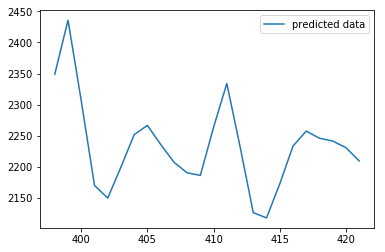

In [9]:
data_len = len(data)
#plt.plot(list(range(data_len)),comparison['Actual'].values.tolist(),label="actual data")
plt.plot(list(range(data_len,data_len+len(predictions))),p_list,label="predicted data")
plt.legend()
plt.show()

In [10]:
p_list

[2349.004921913147,
 2435.624708175659,
 2306.05419588089,
 2170.151319026947,
 2149.6861543655396,
 2199.689378261566,
 2251.8276510238647,
 2266.5538291931152,
 2236.0260977745056,
 2207.481472492218,
 2190.326500415802,
 2186.2086725234985,
 2263.7637419700623,
 2333.84352350235,
 2232.5103163719177,
 2126.298749923706,
 2117.86519241333,
 2172.6121697425842,
 2233.2742824554443,
 2257.44756937027,
 2245.94113779068,
 2241.4592361450195,
 2230.8420538902283,
 2209.5242762565613]